In [76]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [77]:
from keras.models import Sequential
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.layers import Dense, Flatten,Conv2D,Dropout,SeparableConv2D,MaxPooling2D
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.models import load_model
from sklearn.metrics import classification_report
import numpy as np

In [83]:
my_new_model = Sequential()
my_new_model.add(Conv2D(32,(7,7),activation='relu',input_shape=(224,224,3)))
my_new_model.add(MaxPooling2D((2,2)))
my_new_model.add(Dropout(0.2))
my_new_model.add(Conv2D(64,(5,5),activation='relu'))
my_new_model.add(MaxPooling2D((2,2)))
my_new_model.add(Dropout(0.2))

my_new_model.add(Conv2D(32,(3,3),activation='relu'))
my_new_model.add(MaxPooling2D((2,2)))
my_new_model.add(Dropout(0.3))

my_new_model.add(Conv2D(16,(3,3),activation='relu'))
my_new_model.add(MaxPooling2D((2,2)))
my_new_model.add(Dropout(0.3))

my_new_model.add(Flatten())
my_new_model.add(Dense(16,activation='relu'))
my_new_model.add(Dropout(0.5))
my_new_model.add(Dense(2, activation='softmax'))
# Indicate whether the first layer should be trained/changed or not.
my_new_model.layers[0].trainable = False  

my_new_model.compile(optimizer='adam', 
                     loss='categorical_crossentropy', 
                     metrics=['accuracy'])

In [84]:
my_new_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 218, 218, 32)      4736      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 109, 109, 32)      0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 109, 109, 32)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 105, 105, 64)      51264     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 52, 52, 64)        0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 52, 52, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 50, 50, 32)       

In [132]:
image_size = 224
data_generator = ImageDataGenerator(featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    samplewise_center=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode="nearest",
    cval=0.0,
    vertical_flip=False,
    rescale=1.0/255.0,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.2,
    dtype=None)

train_generator = data_generator.flow_from_directory(
                                        directory=r"/content/gdrive/My Drive/ANN project/face-mask-detector-master/resources/dataset",
                                        target_size=(image_size, image_size),
                                        subset='training',
                                        batch_size=10,
                                        shuffle=True,
                                        class_mode='categorical')
validation_generator = data_generator.flow_from_directory(
                                        directory=r"/content/gdrive/My Drive/ANN project/face-mask-detector-master/resources/dataset",
                                        target_size=(image_size, image_size),
                                        subset='validation',
                                        shuffle=True,
                                        batch_size=10,
                                        class_mode='categorical')

classes = ['without_mask', 'with_mask']


Found 1101 images belonging to 2 classes.
Found 275 images belonging to 2 classes.


In [86]:
fit_stats = my_new_model.fit_generator(generator = train_generator,
                                steps_per_epoch = len(train_generator),
                                epochs =20,
                                validation_data = validation_generator,
                                validation_steps=1)
 

Epoch 1/20


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


111/111 [==============================] - 121s 1s/step - loss: 0.7023 - accuracy: 0.5123 - val_loss: 0.6848 - val_accuracy: 0.6000
Epoch 2/20
111/111 [==============================] - 118s 1s/step - loss: 0.5881 - accuracy: 0.6694 - val_loss: 0.2452 - val_accuracy: 1.0000
Epoch 3/20
111/111 [==============================] - 118s 1s/step - loss: 0.4649 - accuracy: 0.7520 - val_loss: 1.0595 - val_accuracy: 0.4000
Epoch 4/20
111/111 [==============================] - 118s 1s/step - loss: 0.3484 - accuracy: 0.8801 - val_loss: 0.1333 - val_accuracy: 1.0000
Epoch 5/20
111/111 [==============================] - 118s 1s/step - loss: 0.3254 - accuracy: 0.8837 - val_loss: 0.1308 - val_accuracy: 1.0000
Epoch 6/20
111/111 [==============================] - 118s 1s/step - loss: 0.2679 - accuracy: 0.9055 - val_loss: 0.2542 - val_accuracy: 0.9000
Epoch 7/20
111/111 [==============================] - 118s 1s/step - loss: 0.2952 - accuracy: 0.9010 - val_loss: 0.0747 - val_accuracy: 1.0000
Epoch 8/20

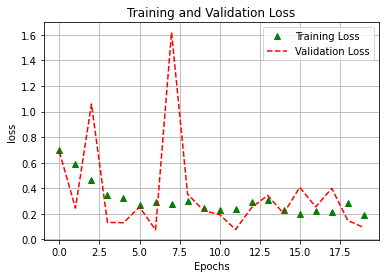

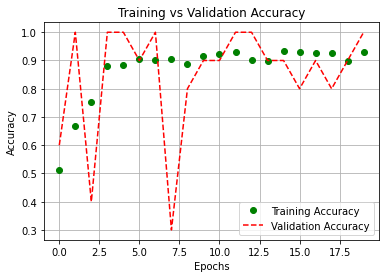

In [133]:
plt.plot(fit_stats.history['loss'],'g^',label='Training Loss')
plt.plot(fit_stats.history['val_loss'],'r--',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.grid(True)
plt.legend()
plt.show()
plt.plot(fit_stats.history['accuracy'],'go',label='Training Accuracy')
plt.plot(fit_stats.history['val_accuracy'],'r--',label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()




In [137]:
lab = validation_generator.classes
pred= my_new_model.predict(validation_generator)

predicted_class_indices=np.argmax(pred,axis=1)

labels = (validation_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [138]:
lab

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [141]:
labe.shape

(275,)

In [142]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, mean_absolute_error, precision_score, recall_score

rc = roc_curve(predicted_class_indices,lab)
cf_matrix = confusion_matrix(predicted_class_indices,lab)
cf_report = classification_report(predicted_class_indices,lab)
print('Confusion matrix report of the model : \n{}'.format(cf_matrix))

Confusion matrix report of the model : 
[[75 74]
 [63 63]]


In [143]:
print('Classification report of the model : \n{}'.format(cf_report))

Classification report of the model : 
              precision    recall  f1-score   support

           0       0.54      0.50      0.52       149
           1       0.46      0.50      0.48       126

    accuracy                           0.50       275
   macro avg       0.50      0.50      0.50       275
weighted avg       0.51      0.50      0.50       275



In [104]:
class_names

dict_keys(['with_mask', 'without_mask'])

<Figure size 432x288 with 0 Axes>

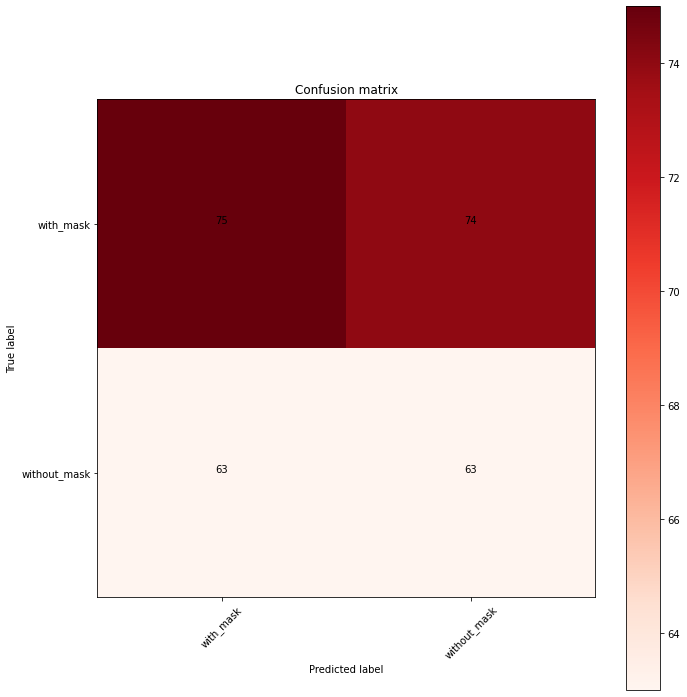

In [147]:
import itertools

def plot_confusion_matrix(cf_matrix, classes, title='Confusion matrix', cmap=plt.cm.Blues,normalize=True):
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 10))
    plt.grid(b=False)
    plt.imshow(cf_matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if class_names is not None:
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names, rotation=45)
        plt.yticks(tick_marks, class_names)
    if normalize:
        cf_matrix = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]
    
    thresh = cf_matrix.max() / 1.5 if normalize else cf_matrix.max() / 2
    for i, j in itertools.product(range(cf_matrix.shape[0]), range(cf_matrix.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cf_matrix[i, j]),
                     horizontalalignment="center",
                     color="black" if cf_matrix[i, j] > thresh else "white")
        else:
            plt.text(j, i, "{:,}".format(cf_matrix[i, j]),
                     horizontalalignment="center",
                     color="black" if cf_matrix[i, j] > thresh else "white")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
# compute confusion matrix
cnf_matrix = confusion_matrix(predicted_class_indices,lab)
np.set_printoptions(precision=np.random.randint(0,9))

# plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False ,title='Confusion matrix',cmap='Reds')
plt.show()

In [179]:
my_new_model.save_weights('model_wieghts.h5')
my_new_model.save('Mask_detection_model.h5')

In [180]:
import cv2
import keras
from google.colab.patches import cv2_imshow
import keras
from keras.models import load_model
from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform

with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
        model = load_model("/content/gdrive/My Drive/ANN project/face-mask-detector-master/resources/Mask_detection_model.h5")

In [181]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 218, 218, 32)      4736      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 109, 109, 32)      0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 109, 109, 32)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 105, 105, 64)      51264     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 52, 52, 64)        0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 52, 52, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 50, 50, 32)       

In [186]:
image=cv2.imread('/content/gdrive/My Drive/ANN project/face-mask-detector-master/resources/images.jfif')

In [187]:
prototxtPath = '/content/gdrive/My Drive/ANN project/face-mask-detector-master/resources/face_detector/deploy.prototxt'
weightsPath = '/content/gdrive/My Drive/ANN project/face-mask-detector-master/resources/face_detector/res10_300x300_ssd_iter_140000.caffemodel'
face_model = cv2.dnn.readNet(prototxtPath, weightsPath)

In [188]:
height, width = image.shape[:2]
blob = cv2.dnn.blobFromImage(image, 1.0, (224, 224), (104.0, 177.0, 123.0))
face_model.setInput(blob)
detections=face_model.forward()

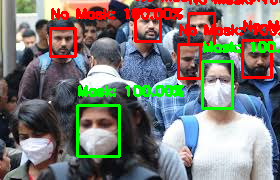

In [189]:
from google.colab.patches import cv2_imshow
threshold = 0.2
person_with_mask = 0
person_without_mask = 0
for i in range(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > 0.5:
        box = detections[0, 0, i, 3:7] * np.array([width, height, width, height])
        (startX, startY, endX, endY) = box.astype("int")
        (startX, startY) = (max(0, startX), max(0, startY))
        (endX, endY) = (min(width - 1, endX), min(height - 1, endY))

        face = image[startY:endY, startX:endX]
        face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
        face = cv2.resize(face, (224, 224))
        face = img_to_array(face)
        face = preprocess_input(face)
        face = np.expand_dims(face, axis=0)

        (withoutMask, mask) = model.predict(face)[0]
        label = "Mask" if mask > withoutMask else "No Mask"
        color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

        label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)

        cv2.putText(image, label, (startX, startY - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
        cv2.rectangle(image, (startX, startY), (endX, endY), color, 2)
cv2_imshow(image)

In [ ]:
|